In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost as xgb

In [5]:

  
dataframe1 = pd.read_csv("phone_5g_sale_data-20210528.csv")

  

# storing this dataframe in a csv file
#dataframe1.to_csv('qh_5g_phone_sale-20210419.csv', index = None)

In [6]:
dataframe1.head()

,msisdn,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,...,video_traff,age,gender,net_type,month_fee,overdue_owe,term_svc,phone_company,phone_used_months,phones_owned
0,15609769599,26.0,6,777,4361734,0,0,0,1,0,...,47086,36,1,4G,80.0,0.0,4G终端,苹果,2,3
1,17697389231,33.0,7,2005,94794528,0,0,0,5,1000,...,108552,41,1,4G,60.0,0.0,4G终端,欧珀,5,4
2,18697294282,41.0,7,15659,884812544,0,0,0,5,743,...,114783,51,2,4G,50.0,0.0,4G终端,欧珀,26,3
3,15597013886,70.0,7,17607,601609856,0,0,0,4,1165,...,12446,47,2,4G,0.0,0.0,5G终端,华为,10,2
4,13119732278,25.0,7,1069,1881998,0,0,0,2,55,...,488754,34,1,4G,50.0,0.0,4G终端,欧珀,28,1


In [7]:
type(dataframe1['term_svc'][1])

str

In [8]:
dataframe1['gender'] = dataframe1['gender'].astype(str)


In [9]:
dataframe1['msisdn'] = dataframe1['msisdn'].astype(str)

In [7]:
dataframe1.head()

,msisdn,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,...,video_traff,age,gender,net_type,month_fee,overdue_owe,term_svc,phone_company,phone_used_months,phones_owned
0,15609769599,26.0,6,777,4361734,0,0,0,1,0,...,47086,36,1,4G,80.0,0.0,4G终端,苹果,2,3
1,17697389231,33.0,7,2005,94794528,0,0,0,5,1000,...,108552,41,1,4G,60.0,0.0,4G终端,欧珀,5,4
2,18697294282,41.0,7,15659,884812544,0,0,0,5,743,...,114783,51,2,4G,50.0,0.0,4G终端,欧珀,26,3
3,15597013886,70.0,7,17607,601609856,0,0,0,4,1165,...,12446,47,2,4G,0.0,0.0,5G终端,华为,10,2
4,13119732278,25.0,7,1069,1881998,0,0,0,2,55,...,488754,34,1,4G,50.0,0.0,4G终端,欧珀,28,1


In [8]:
dataframe1.dtypes

msisdn                object
apps                 float64
social_days            int64
social_durition        int64
social_traff           int64
game_days              int64
game_durition          int64
game_traff             int64
shop_days              int64
shop_durition          int64
shop_traff             int64
video_days             int64
video_durition         int64
video_traff            int64
age                    int64
gender                object
net_type              object
month_fee            float64
overdue_owe          float64
term_svc              object
phone_company         object
phone_used_months      int64
phones_owned           int64
dtype: object

In [9]:
#dataframe1.to_csv('qh_5g_phone_sale-20210419.csv', index = None)

In [9]:
dataframe1.describe()

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,video_days,video_durition,video_traff,age,month_fee,overdue_owe,phone_used_months,phones_owned
count,691100.000000,691100.000000,6.911000e+05,6.911000e+05,691100.000000,691100.000000,6.911000e+05,691100.000000,691100.000000,6.911000e+05,691100.000000,691100.000000,6.911000e+05,691100.000000,691100.000000,691100.000000,691100.000000,691100.000000
mean,48.558997,6.525549,2.267751e+04,7.704002e+08,0.709782,106.171483,6.916313e+06,3.683672,4276.004962,4.709691e+06,3.279042,1314.269440,3.531598e+07,39.218505,68.068162,1.221850,14.094186,2.383347
std,20.538803,1.190675,3.198877e+04,1.122003e+09,1.427650,799.630088,6.534440e+07,1.590469,7754.636253,2.556544e+07,1.708388,6285.989607,1.923325e+08,12.597792,84.664534,74.170707,10.178174,1.396293
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,10.000000,0.000000,0.000000,1.000000,1.000000
25%,33.000000,7.000000,2.759000e+03,4.547844e+07,0.000000,0.000000,0.000000e+00,3.000000,113.000000,2.325692e+05,2.000000,8.000000,4.185750e+04,29.000000,3.000000,0.000000,5.000000,1.000000
50%,47.000000,7.000000,1.096700e+04,3.386376e+08,0.000000,0.000000,0.000000e+00,4.000000,1414.000000,1.195136e+06,4.000000,94.000000,6.550805e+05,38.000000,50.000000,0.000000,12.000000,2.000000
75%,63.000000,7.000000,3.003100e+04,1.045776e+09,1.000000,1.000000,1.603245e+05,5.000000,5580.000000,3.632310e+06,5.000000,510.000000,9.356727e+06,49.000000,100.000000,0.000000,22.000000,3.000000
max,146.000000,7.000000,1.408452e+06,2.976357e+10,7.000000,195625.000000,5.986078e+09,5.000000,469734.000000,8.164385e+09,5.000000,522396.000000,2.181799e+10,100.000000,11977.970000,50256.710000,36.000000,26.000000


In [2]:
net_type = pd.get_dummies(dataframe1['net_type'])
gender = pd.get_dummies(dataframe1['gender'], columns = ['male', 'female'])
phone_company = pd.get_dummies(dataframe1['phone_company'])

NameError: name 'pd' is not defined

In [12]:
phone_company.columns.tolist()

['1米',
 '26.0',
 '360',
 '360JILUYI',
 '5GHYUN',
 '8848',
 'AIR',
 'ALCATEL',
 'ALDDNG',
 'ALEKA',
 'ALPINE',
 'ANGELCARE',
 'ARTIMEN',
 'ATMAN',
 'BADILONG',
 'BEIDOUTIANHUI',
 'BENTENG',
 'BLACKBERRY',
 'BROADMOBI',
 'CAREPRO',
 'COMBA',
 'COOL',
 'DFYOU',
 'DOOGEE',
 'DUSHULANG',
 'E人E本',
 'FEIYUESHIDAI',
 'FIBERHOME',
 'FIBOCOM',
 'FIGI',
 'FORGE',
 'FORTUNE',
 'FRUITFANS',
 'GEMTEK',
 'GOOGLE',
 'GOSUNCN',
 'HERO',
 'HIKVISION',
 'HOJY',
 'HOSWN',
 'HOT',
 'HUAZHENGYISHANG',
 'HUBAOXING',
 'IFLYTEK',
 'ILEJA',
 'IMOO',
 'IQOO',
 'IVVI',
 'IWINGS',
 'JUANMENG',
 'KAICOM',
 'KK',
 'KRETA',
 'KUYI',
 'LANXIAOBAN',
 'LEKEER',
 'LG',
 'LIEBAOYIDONG',
 'LOKMAT',
 'LONGSUNG',
 'LQ',
 'LYNQ',
 'M',
 'MAILONG',
 'MAISUN',
 'MEIIGOO',
 'MIJU',
 'MIMITOOU',
 'MLLED',
 'MOBVOI',
 'NEOWAY',
 'NEWMAN纽曼',
 'NODECOM',
 'NOT',
 'NOTKNOWN',
 'OBXIN',
 'OPENTOGETHER',
 'OTL',
 'QIMI',
 'QUECTEL',
 'REALME',
 'RED,REDHYDROGEN,HYDROGEN',
 'REMOWIRELESS',
 'ROTISS',
 'SCV',
 'SENRAISE',
 'SIMCOM',
 'SO

In [ ]:
phone_company = phone_company.rename(columns = {'1米': '1mi', 'E人E本': 'E ren E ben', 'NEWMAN纽曼': 'NEWMAN', '一加': 'OnePlus', '万旭麒': 'vetas', '万普拉斯': 'wanpulasi', '三星': 'sumsung', '东方拓宇': 'eastaeon', '东方蓝':'dongfanglan',
                                               '东集':'dongji', '中兴':'zte', '中电':'zhongdian', '中诺':'zhongnuo', '乐丰':'lefeng', '乐信时代':'lexinshidai', '乐视':'le', '乐购天地', 'legoutiandi', '亚奥星':'yaaoxing', 
                                               '京华':'jinghua', '亿优':'yiyou', '亿科泰达':'yiketaida', '众思云':'zhongsiyun', '众赢':'zhongying','优博讯':'youboxun', '优友':'youyou', '优品通':'youpintong', '优购':'yougou', '佳达易通':'jiadayitong', 
                                               '依偎':'yiwei', '保千里':'baoqianli', '兰铂':'lanbo', '几米':'jimi', '凯利通':'kailitong', '努比亚':'nubia','华为':'huawei', '华信盛邦':'huaxinshengbang', '华森':'huasen', '华硕':'huashuo', '华禹':'huayu', '卡尔':'karl',
                                               '卡布奇诺':'capuccino', '厘米':'limi', '友利通':'youlitong', '台电':'taidian', '君务':'junwu', '和':'he','唐为':'tangwei','唯米':'weimi', '四吉':'siji', '国美':'gome', '壹伍ONEFIVE':'ONEFIVE', '夏普':'Sharp',
                                               '多亲':'duoqin','大唐':'datang', '天翼':'tianyi', '天语':'tianyu', '天龙世纪':'tianlongshiji', '奇酷':'qiku', '奥卓':'aozhuo', '奥洛斯':'aoluosi', '威兹奥':'weiziao', '宇飞来':'yufeilai', '守护宝':'shouhubao', '宏沃':'hongwo',
                                               '宏牛':'hongniu', '宏达':'hongda', '小码哥':'xiaomage', '小米':'mi', '小辣椒':'xiaolajiao', '尼凯恩':'nikaien','巨盛':'jusheng', '帷幄':'weiwo', '广信':'guangxin', '康佳':'kangjia', '康凯思特':'kangkaisite', '微软':'microsoft',
                                               '德信':'dexin', '德赛':'desai', '心迪宝':'xindibao', '恒宇丰':'hengyufeng', '恒语':'hengyu', '惠族':'huizu','托普':'tuopu', '捷讯':'jiexun', '摩乐':'mole', '摩托无线':'motuowuxian', '摩托罗拉':'motuoluola', '斐讯':'feixun',
                                               '新大陆':'xindalu', '新石器龙码':'xinshiqilongma', '时通伟业':'shitongweiye', '星维':'xingwei','普创天信':'puchuangtianxin','普联':'pulian', '智迅达':'zhixunda', '朵唯':'duowei', '柔宇':'rouyu', '格力':'glee', '欧亚信':'ouyaxin', '欧加':'oujia',
                                               '欧奇':'ouqi', '欧拓':'outuo', '欧珀':'oubo','步步高':'bubugao', '波导':'bodao', '海信':'haixin', '海尔':'haier','海恩迈':'haienmai', '海沃':'haiwo', '海派贵族':'haipaiguizu', '漫猫':'manmao', '爱立顺':'ailishun', '瑞高':'ruigao',
                                               '电意':'dianyi', '男人':'nanren', '百事乐':'baishile', '百合':'baihe', '皓轩':'haoxuan', '移动':'10086', '米莱':'milai','米蓝':'milan', '米语':'miyu', '糖果':'tangguo', '索尼':'sony', '索尼爱立信':'sony ailixin', '索普':'suopu',
                                               '索爱':'suoai', '索野':'suoye', '紫米':'zmi', '红米':'Redmi','红鸟':'red bird', '纬图':'weitu', '纽曼':'newman','维沃':'weiwo', '美图':'meitu', '美富通':'meifutong', '聆韵':'lingyun', '联想':'lenovo', '联迪':'liandi',
                                               '脉腾':'maiteng', '自由客':'ziyouke', '舒高':'shugao', '花米':'huami', '英华达':'yinghuada', '苹果':'apple', '荣耀':'honor', '荣耀,华为', 'honor huawei', '蓝博兴':'lanboxing', '蓝魔':'lanmo', '詹姆士':'James', '誉品':'yupin',
                                               '诺克拉':'nuokela', '诺基亚':'Nokia', '诺奇':'nuoqi', '读书郎':'dushulang', '贝尔丰':'beierfeng', '财富之舟':'caifuzhizhou','赛尔丰':'saierfeng', '赫比':'hebi', '迪美':'dimei', '邦华':'banghua', '酷乐':'kule', '酷比':'kubi', '酷派':'kupai',
                                               '酷聊':'kuliao', '酷驰':'kuchi', '金国威':'jinguowei', '金科':'jinke', '金立':'jinli', '铂爵':'bojue','锤子':'chuizi', '长虹':'changhong',
                                               '阿巴町':'abating', '青橙':'qingcheng','飞利浦':'feilipu', '首弘':'shouhong', '魅族':'meizu', '魅莱':'meilai',
                                               '黑莓':'blackberry', '黑鲨':'black shark'})

In [36]:
gender = gender.rename(columns = {'1': 'male', '2':'female'})
gender

,male,female
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
691095,1,0
691096,0,1
691097,0,1
691098,1,0


In [46]:
net_type = net_type.rename(columns = {'4G':'4G net', '5G': '5G net'})
net_type

,4G net,5G net
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
691095,1,0
691096,1,0
691097,1,0
691098,1,0


In [18]:
termsvc_dict = {'4G终端':0, '5G终端':1}
dataframe1['term_svc'] = dataframe1['term_svc'].apply(lambda x: termsvc_dict[x])

In [19]:
dataframe1['term_svc'] = dataframe1['term_svc'].astype('int')

In [47]:
df1 = pd.concat([dataframe1, net_type, gender, phone_company], axis = 1)

In [51]:
df1 = df1.drop(['msisdn', 'net_type', 'gender', 'phone_company'], axis = 1)

In [52]:
df1.columns.values.tolist()

['apps',
 'social_days',
 'social_durition',
 'social_traff',
 'game_days',
 'game_durition',
 'game_traff',
 'shop_days',
 'shop_durition',
 'shop_traff',
 'video_days',
 'video_durition',
 'video_traff',
 'age',
 'month_fee',
 'overdue_owe',
 'term_svc',
 'phone_used_months',
 'phones_owned',
 '4G net',
 '5G net',
 'male',
 'female',
 '1米',
 '26.0',
 '360',
 '360JILUYI',
 '5GHYUN',
 '8848',
 'AIR',
 'ALCATEL',
 'ALDDNG',
 'ALEKA',
 'ALPINE',
 'ANGELCARE',
 'ARTIMEN',
 'ATMAN',
 'BADILONG',
 'BEIDOUTIANHUI',
 'BENTENG',
 'BLACKBERRY',
 'BROADMOBI',
 'CAREPRO',
 'COMBA',
 'COOL',
 'DFYOU',
 'DOOGEE',
 'DUSHULANG',
 'E人E本',
 'FEIYUESHIDAI',
 'FIBERHOME',
 'FIBOCOM',
 'FIGI',
 'FORGE',
 'FORTUNE',
 'FRUITFANS',
 'GEMTEK',
 'GOOGLE',
 'GOSUNCN',
 'HERO',
 'HIKVISION',
 'HOJY',
 'HOSWN',
 'HOT',
 'HUAZHENGYISHANG',
 'HUBAOXING',
 'IFLYTEK',
 'ILEJA',
 'IMOO',
 'IQOO',
 'IVVI',
 'IWINGS',
 'JUANMENG',
 'KAICOM',
 'KK',
 'KRETA',
 'KUYI',
 'LANXIAOBAN',
 'LEKEER',
 'LG',
 'LIEBAOYIDONG',
 'L

In [64]:
train_1 = df1[df1['term_svc'] == 1]
train_1

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,...,锤子,长虹,阿巴町,青橙,飞利浦,首弘,魅族,魅莱,黑莓,黑鲨
3,70.0,7,17607,601609856,0,0,0,4,1165,5810802,...,0,0,0,0,0,0,0,0,0,0
8,71.0,7,46723,1343274624,6,1277,41312168,5,5116,3195757,...,0,0,0,0,0,0,0,0,0,0
15,72.0,7,119332,4107296256,0,0,0,5,11417,2641521,...,0,0,0,0,0,0,0,0,0,0
18,93.0,7,54211,1894689280,2,18,1870614,5,6720,7269714,...,0,0,0,0,0,0,0,0,0,0
24,85.0,7,78003,6256243712,5,605,55647116,5,23818,8834412,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691064,62.0,7,10382,16521141,0,0,0,3,55,1018558,...,0,0,0,0,0,0,0,0,0,0
691075,67.0,7,1342,5299376,0,0,0,5,2538,788995,...,0,0,0,0,0,0,0,0,0,0
691083,70.0,7,10274,317589696,0,0,0,5,3298,4180101,...,0,0,0,0,0,0,0,0,0,0
691095,50.0,7,8124,147563776,0,0,0,5,1930,744854,...,0,0,0,0,0,0,0,0,0,0


In [65]:

df1_4g = df1[df1['term_svc'] == 0]
df1_4g

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,...,锤子,长虹,阿巴町,青橙,飞利浦,首弘,魅族,魅莱,黑莓,黑鲨
0,26.0,6,777,4361734,0,0,0,1,0,3948,...,0,0,0,0,0,0,0,0,0,0
1,33.0,7,2005,94794528,0,0,0,5,1000,483126,...,0,0,0,0,0,0,0,0,0,0
2,41.0,7,15659,884812544,0,0,0,5,743,19627464,...,0,0,0,0,0,0,0,0,0,0
4,25.0,7,1069,1881998,0,0,0,2,55,193110,...,0,0,0,0,0,0,0,0,0,0
5,27.0,7,61765,3866256896,0,0,0,4,40,199243,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691093,69.0,6,22820,659151424,4,165,4102303,4,5295,1146657,...,0,0,0,0,0,0,0,0,0,0
691094,46.0,7,161585,2667375616,0,0,0,5,11507,4532269,...,0,0,0,0,0,0,0,0,0,0
691096,58.0,7,6043,339803072,0,0,0,2,991,2595562,...,0,0,0,0,0,0,0,0,0,0
691097,70.0,7,23403,1154801536,1,0,938,5,2173,3312542,...,0,0,0,0,0,0,0,0,0,0


In [66]:
train_0 = df1_4g.sample(n = len(train_1), replace = False, random_state = 5)
train_0.head()

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,...,锤子,长虹,阿巴町,青橙,飞利浦,首弘,魅族,魅莱,黑莓,黑鲨
656247,70.0,7,20040,693317312,3,484,29688060,5,5078,1705435,...,0,0,0,0,0,0,0,0,0,0
263797,70.0,7,38534,2428462336,2,54,1946090,2,217,2502575,...,0,0,0,0,0,0,0,0,0,0
515554,15.0,7,164,762462,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425509,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689384,35.0,6,4262,130218080,0,0,0,4,2953,1862265,...,0,0,0,0,0,0,0,0,0,0


In [67]:
train = train_0.append(train_1, ignore_index = True)
train

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,...,锤子,长虹,阿巴町,青橙,飞利浦,首弘,魅族,魅莱,黑莓,黑鲨
0,70.0,7,20040,693317312,3,484,29688060,5,5078,1705435,...,0,0,0,0,0,0,0,0,0,0
1,70.0,7,38534,2428462336,2,54,1946090,2,217,2502575,...,0,0,0,0,0,0,0,0,0,0
2,15.0,7,164,762462,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,6,4262,130218080,0,0,0,4,2953,1862265,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274343,62.0,7,10382,16521141,0,0,0,3,55,1018558,...,0,0,0,0,0,0,0,0,0,0
274344,67.0,7,1342,5299376,0,0,0,5,2538,788995,...,0,0,0,0,0,0,0,0,0,0
274345,70.0,7,10274,317589696,0,0,0,5,3298,4180101,...,0,0,0,0,0,0,0,0,0,0
274346,50.0,7,8124,147563776,0,0,0,5,1930,744854,...,0,0,0,0,0,0,0,0,0,0


In [68]:
len(train)

274348

In [69]:
y = train['term_svc']
x = train.drop(['term_svc'],  axis = 1) #尝试drop net_type

In [70]:
x.head()

,apps,social_days,social_durition,social_traff,game_days,game_durition,game_traff,shop_days,shop_durition,shop_traff,...,锤子,长虹,阿巴町,青橙,飞利浦,首弘,魅族,魅莱,黑莓,黑鲨
0,70.0,7,20040,693317312,3,484,29688060,5,5078,1705435,...,0,0,0,0,0,0,0,0,0,0
1,70.0,7,38534,2428462336,2,54,1946090,2,217,2502575,...,0,0,0,0,0,0,0,0,0,0
2,15.0,7,164,762462,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,6,4262,130218080,0,0,0,4,2953,1862265,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [22]:
#Xgboost

In [72]:
dtrain = xgb.DMatrix(X_train, label= y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, enable_categorical=True)
watchlist = [(dtrain, 'train')]

In [73]:
watchlist

[(<xgboost.core.DMatrix at 0x1dc89356cd0>, 'train')]

In [74]:
params = {'booster':'gbtree', 
          'objective': 'binary:logistic',
          'eval_metric':'auc',
          'max_depth': 4,
          'lambda':10,
          'subsample':0.75,
          'colsample_bytree':0.75,
          'min_child_weight': 2,
          'eta': 0.025,
          'seed': 0,
          'nthread': 8,
          'gamma':0.15,
          'learning_rate': 0.01}
bst = xgb.train(params, dtrain, num_boost_round = 50, evals = watchlist)
ypred = bst.predict(dtest)

[0]	train-auc:0.86562
[1]	train-auc:0.87505
[2]	train-auc:0.87330
[3]	train-auc:0.88132
[4]	train-auc:0.87804
[5]	train-auc:0.88624
[6]	train-auc:0.88892
[7]	train-auc:0.89053
[8]	train-auc:0.89088
[9]	train-auc:0.88929
[10]	train-auc:0.88963
[11]	train-auc:0.89014
[12]	train-auc:0.89055
[13]	train-auc:0.88959
[14]	train-auc:0.88978
[15]	train-auc:0.88995
[16]	train-auc:0.88997
[17]	train-auc:0.88986
[18]	train-auc:0.89000
[19]	train-auc:0.88984
[20]	train-auc:0.88972
[21]	train-auc:0.88946
[22]	train-auc:0.88916
[23]	train-auc:0.88901
[24]	train-auc:0.88929
[25]	train-auc:0.88946
[26]	train-auc:0.88935
[27]	train-auc:0.88918
[28]	train-auc:0.88923
[29]	train-auc:0.88907
[30]	train-auc:0.88901
[31]	train-auc:0.88893
[32]	train-auc:0.88908
[33]	train-auc:0.88909
[34]	train-auc:0.88916
[35]	train-auc:0.88896
[36]	train-auc:0.88973
[37]	train-auc:0.88978
[38]	train-auc:0.89023
[39]	train-auc:0.89010
[40]	train-auc:0.88980
[41]	train-auc:0.89004
[42]	train-auc:0.88992
[43]	train-auc:0.8897

In [89]:
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(y_test, y_pred))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(y_test,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,ypred))

Precesion: 0.7469
Recall: 0.9578
F1-score: 0.8393
Accuracy: 0.8162
AUC: 0.8898


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-

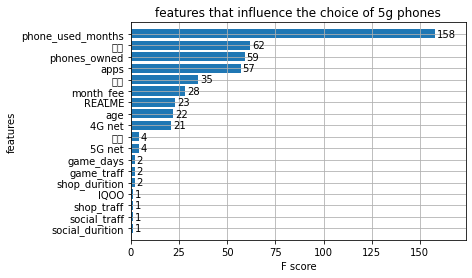

In [75]:
xgb.plot_importance(bst,height=0.8,title='features that influence the choice of 5g phones', ylabel='features')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()

In [93]:
xgb.feature_importances_

AttributeError: module 'xgboost' has no attribute 'feature_importances_'

In [ ]:
df1_4g = df1_4g.drop(['term_svc'], axis = 1)

In [78]:
df1_4g.columns.values.tolist()

['apps',
 'social_days',
 'social_durition',
 'social_traff',
 'game_days',
 'game_durition',
 'game_traff',
 'shop_days',
 'shop_durition',
 'shop_traff',
 'video_days',
 'video_durition',
 'video_traff',
 'age',
 'month_fee',
 'overdue_owe',
 'phone_used_months',
 'phones_owned',
 '4G net',
 '5G net',
 'male',
 'female',
 '1米',
 '26.0',
 '360',
 '360JILUYI',
 '5GHYUN',
 '8848',
 'AIR',
 'ALCATEL',
 'ALDDNG',
 'ALEKA',
 'ALPINE',
 'ANGELCARE',
 'ARTIMEN',
 'ATMAN',
 'BADILONG',
 'BEIDOUTIANHUI',
 'BENTENG',
 'BLACKBERRY',
 'BROADMOBI',
 'CAREPRO',
 'COMBA',
 'COOL',
 'DFYOU',
 'DOOGEE',
 'DUSHULANG',
 'E人E本',
 'FEIYUESHIDAI',
 'FIBERHOME',
 'FIBOCOM',
 'FIGI',
 'FORGE',
 'FORTUNE',
 'FRUITFANS',
 'GEMTEK',
 'GOOGLE',
 'GOSUNCN',
 'HERO',
 'HIKVISION',
 'HOJY',
 'HOSWN',
 'HOT',
 'HUAZHENGYISHANG',
 'HUBAOXING',
 'IFLYTEK',
 'ILEJA',
 'IMOO',
 'IQOO',
 'IVVI',
 'IWINGS',
 'JUANMENG',
 'KAICOM',
 'KK',
 'KRETA',
 'KUYI',
 'LANXIAOBAN',
 'LEKEER',
 'LG',
 'LIEBAOYIDONG',
 'LOKMAT',
 'LON

In [81]:
d4g = xgb.DMatrix(df1_4g, enable_categorical = True)
result = bst.predict(d4g)

In [87]:
sum(result > 0.6)

21433